In [9]:
#IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [10]:
#LOADING THE DATASET
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#EXPLORING THE DATASET
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#HANDLING MISSING VALUES
df['Age']=df['Age'].fillna(df['Age'].median())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [13]:
#DROP "Cabin" COLUMN (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

In [14]:
#ENCODE CATEGORICAL VALUES
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
#FEATURE SCALING
#STANDAARDIZATION
scaler = StandardScaler()
df[['Age', 'Fare']]= scaler.fit_transform(df[['Age', 'Fare']])

In [16]:
#NORMALIZATION
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

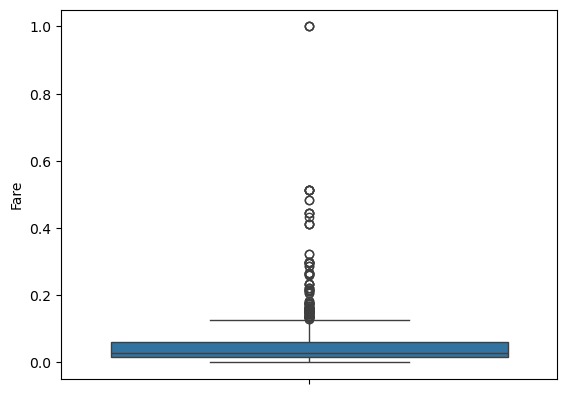

In [17]:
#DETECT AND REMOVE OUTLIERS
sns.boxplot(df['Fare'])
plt.show()
#removing outliers using IQR
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['Fare']>=Q1-1.5*IQR)&(df['Fare']<=Q3+1.5*IQR)]

In [18]:
df.to_csv('cleaned_titanic.csv',index=False)

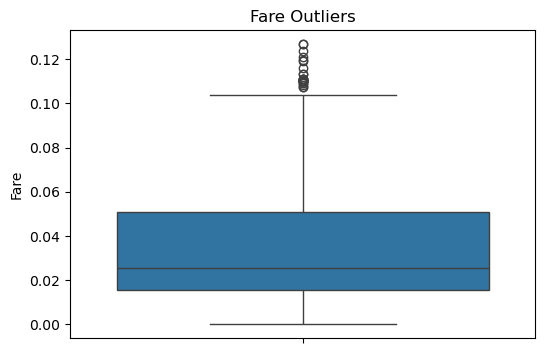

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['Fare'])
plt.title('Fare Outliers')
plt.savefig('fare_boxplot.png')  # Saves the plot as a PNG image
plt.show()
